# **Assignment 3: Using Bokeh to Analyze Changes in False Claim Sources Over Time**

### Exploring PolitiFact fact checks of 21,152 statements from 2008 to 2022 using Bokeh, an interactive visualization library
#### By Frankie Pike, SIADS 521, Data Source: [Kaggle](https://www.kaggle.com/datasets/rmisra/politifact-fact-check-dataset?resource=download)
---

## Visualization Technique
#### A narrative description of the visualization you are planning to use, describing how it works
A discussion of in which circumstances this visualization should and should not be used (what is it close to? What else could you consider? How does it relate to specific aspects of data?

## Visualization Library
#### The library you are going to use, and a background on why the library is good for this visualization. For instance, who created it? Is it open source? How do you install it?
A discussion of the general approach and limitations of this library. For instance, Is it declarative or procedural? Does it integrate with Jupyter? Why did you decide to use this library (especially if there are other options)?

In [1]:
pip install jupyter_bokeh

Note: you may need to restart the kernel to use updated packages.


In [2]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

## Demonstration 
#### The dataset you picked and instructions for cleaning the dataset. You should pick a suitable dataset to demonstrate the technique, toolkit, and problem you are facing. 
The quality of your demonstration. First demonstrate the basics of this approach, then show a few of the edges of how the library might be used for other cases. This is the "meat" of the assignment.

I already downloaded the data from Kaggle and imported it to the workspace. It is saved as politifact_factcheck_data.json. The first thing we need to do is import the necessary libraries and modules.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

Let's read in the data to a Pandas DataFrame. While it is a JSON file, there are some anomalies in the formatting, so we'll read it as a string, fix the anomalies, then convert the fixed JSON to a DataFrame. After we do that, we'll preview it.

In [4]:
# Read the entire JSON file as a string
with open('politifact_factcheck_data.json', 'r') as f:
    json_str = f.read()

# Replace consecutive JSON objects with comma-separated versions within square brackets
fixed_json_str = '[' + json_str.replace('}\n{', '},{') + ']'

# Load the JSON data into a DataFrame
df = pd.read_json(fixed_json_str)
    
#View DataFrame
df.head()

,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
0,true,Barack Obama,John McCain opposed bankruptcy protections for...,6/11/2008,speech,Adriel Bettelheim,6/16/2008,https://www.politifact.com/factchecks/2008/jun...
1,false,Matt Gaetz,"""Bennie Thompson actively cheer-led riots in t...",6/7/2022,television,Yacob Reyes,6/13/2022,https://www.politifact.com/factchecks/2022/jun...
2,mostly-true,Kelly Ayotte,"Says Maggie Hassan was ""out of state on 30 day...",5/18/2016,news,Clay Wirestone,5/27/2016,https://www.politifact.com/factchecks/2016/may...
3,false,Bloggers,"""BUSTED: CDC Inflated COVID Numbers, Accused o...",2/1/2021,blog,Madison Czopek,2/5/2021,https://www.politifact.com/factchecks/2021/feb...
4,half-true,Bobby Jindal,"""I'm the only (Republican) candidate that has ...",8/30/2015,television,Linda Qiu,8/30/2015,https://www.politifact.com/factchecks/2015/aug...


According to Kaggle's documentation of the dataset, each record (i.e. row) consists of 8 attributes (i.e. columns):

+ **verdict:** The verdict of fact check in one of 6 categories: true, mostly-true, half-true, mostly-false, false, and pants-fire
+ **statement_originator:** the person who made the statement being fact checked
+ **statement:** statement being fact checked
+ **statement_date:** the date when statement being fact checked was made
+ **statement_source:** the source where the statement was made. It is one of 13 categories: speech, television, news, blog, social_media, advertisement, campaign, meeting, radio, email, testimony, statement, and other
+ **factchecker:** name of the person who fact checked the claim
+ **factcheck_date:** date when the fact checked article was published
+ **factcheck_analysis_link:** link to the fact checked analysis article

Based on this understanding, let's clean the data. We want the statement_date column to hold DateTime objects and the statement_source column to be categorical. We're also not going to need information such as the factchecker, the factcheck_date, or the factcheck_analysis_link, so we'll remove those columns because they're irrelevant and removing them will reduce the memory footprint and speed up computations.

In [5]:
# Convert to datetime data type
df = df.drop(columns=['factchecker', 'factcheck_date', 'factcheck_analysis_link'])
df['statement_date'] = pd.to_datetime(df['statement_date'])
df = df[df['statement_date'].dt.year >= 2008]
df['statement_source'] = pd.Categorical(df['statement_source'])
df.head()

,verdict,statement_originator,statement,statement_date,statement_source
0,true,Barack Obama,John McCain opposed bankruptcy protections for...,2008-06-11,speech
1,false,Matt Gaetz,"""Bennie Thompson actively cheer-led riots in t...",2022-06-07,television
2,mostly-true,Kelly Ayotte,"Says Maggie Hassan was ""out of state on 30 day...",2016-05-18,news
3,false,Bloggers,"""BUSTED: CDC Inflated COVID Numbers, Accused o...",2021-02-01,blog
4,half-true,Bobby Jindal,"""I'm the only (Republican) candidate that has ...",2015-08-30,television


In [15]:
df_monthly = df.groupby([pd.Grouper(key='statement_date', freq='M'), 'statement_source']).size().reset_index(name='count')

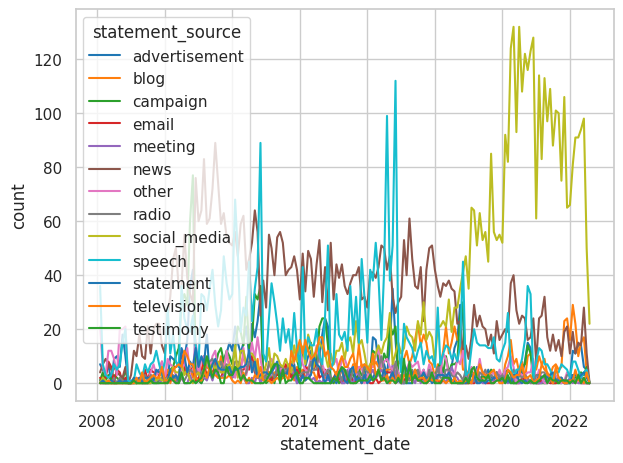

In [17]:
# Plot the data
sns.set(style="whitegrid")
palette = sns.color_palette("tab10", df['statement_source'].nunique())

# Create the line plot
line_plot = sns.lineplot(data=df_monthly, x='statement_date', y='count', hue='statement_source', palette=palette)

# Adjust layout to make sure labels and plot elements are not cut off
line_plot.figure.tight_layout()

# Show the plot
line_plot.figure.show()

In [18]:
df_yearly = df.groupby([pd.Grouper(key='statement_date', freq='Y'), 'statement_source']).size().reset_index(name='count')

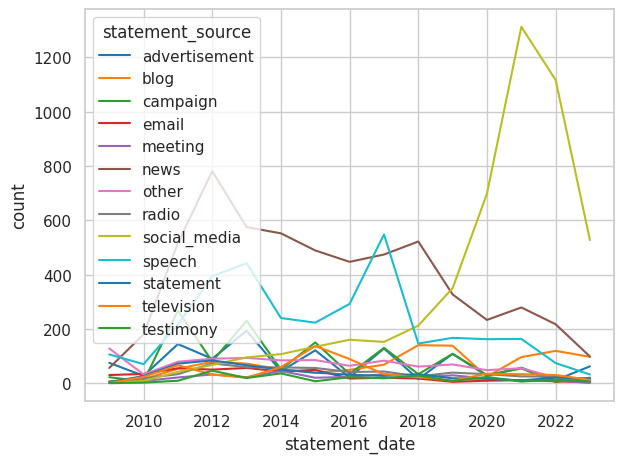

In [19]:
# Create the line plot
line_plot2 = sns.lineplot(data=df_yearly, x='statement_date', y='count', hue='statement_source', palette=palette)

# Adjust layout to make sure labels and plot elements are not cut off
line_plot2.figure.tight_layout()

# Show the plot
line_plot2.figure.show()

In [34]:
# Step 1: Extract the year from the statement_date
df['year'] = df['statement_date'].dt.year

# Step 2: Create a pivot table with counts
pivot_table_counts = df.pivot_table(index='year', columns='statement_source', values='statement_date', aggfunc='count', fill_value=0)

# Step 3: Calculate the percentage of total statements for each year
pivot_table_percentages = pivot_table_counts.div(pivot_table_counts.sum(axis=1), axis=0) * 100

# Step 4: Format the percentages to include '%' and round to one decimal place
formatted_percentages = pivot_table_percentages.round(1).astype(str) + '%'

# Step 5: Highlight the maximum percentage for each year
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

styled_table = pivot_table_percentages.style.apply(highlight_max, axis=1).format("{:.1f}%")

# Step 6: Set the width of each column to be the same
column_widths = {col: "65px" for col in pivot_table_percentages.columns}
styled_table = styled_table.set_table_styles([
    {"selector": "th.col_heading", "props": [("min-width", "65px"), ("max-width", "65px")]}
])

# Display the styled pivot table
styled_table

statement_source,advertisement,blog,campaign,email,meeting,news,other,radio,social_media,speech,statement,television,testimony
year,,,,,,,,,,,,,
2008,17.1%,1.4%,5.0%,6.8%,0.2%,12.8%,29.2%,1.4%,0.7%,24.2%,0.9%,0.2%,0.0%
2009,6.0%,3.3%,1.3%,7.6%,1.8%,40.1%,7.1%,4.0%,1.8%,15.6%,5.8%,5.1%,0.4%
2010,9.1%,3.4%,17.0%,3.5%,1.3%,32.8%,5.0%,2.1%,2.7%,13.7%,4.6%,4.2%,0.6%
2011,4.7%,4.2%,4.2%,2.6%,1.7%,41.1%,4.7%,3.8%,3.5%,20.8%,4.4%,1.7%,2.4%
2012,9.9%,3.7%,11.8%,2.9%,1.1%,29.6%,4.8%,3.0%,4.9%,22.8%,3.4%,1.0%,1.0%
2013,3.1%,3.6%,3.5%,3.0%,3.2%,38.9%,5.9%,4.1%,7.5%,16.9%,3.5%,4.2%,2.5%
2014,7.8%,2.5%,9.7%,3.2%,1.3%,31.6%,5.5%,3.6%,8.7%,14.4%,2.5%,8.9%,0.5%
2015,1.6%,3.8%,2.6%,1.3%,1.8%,34.7%,5.0%,3.2%,12.4%,22.6%,2.4%,6.9%,1.7%
2016,7.3%,3.9%,7.4%,1.1%,1.9%,27.0%,4.7%,2.4%,8.7%,31.2%,1.5%,1.9%,1.0%
